In [1]:
import mlflow
mlflow.set_tracking_uri('https://dagshub.com/annapanfil/punctuation_prediction.mlflow')
logged_model = 'runs:/58b6208c3f4c4d9eab209e82241e2a0b/models'
loaded_model = mlflow.pytorch.load_model(logged_model)

/mnt/dane/.conda/envs/mgr/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/mnt/dane/.conda/envs/mgr/lib/python3.12/site-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
/mnt/dane/.conda/envs/mgr/lib/python3.12/site-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v4.40. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(


In [5]:
loaded_model

DeepPunctuation(
  (bert_layer): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50560, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): 

In [34]:
from transformers import AutoTokenizer
import torch

from config import MODELS
from dataset import Dataset

tokenizer = AutoTokenizer.from_pretrained(MODELS["herbert-base"]["tokenizer_name"])
token_style = MODELS["herbert-base"]["token_style"]

test_set = []

test_set = Dataset("../data/pl/val", tokenizer=tokenizer, sequence_len=256,
            token_style=token_style, is_train=False)

# Data Loaders
data_loader_params = {
'batch_size': 8,
'shuffle': False,
'num_workers': 0
}

test_loader = torch.utils.data.DataLoader(test_set, **data_loader_params)

loading configuration file config.json from cache at /home/anna/.cache/huggingface/hub/models--allegro--herbert-klej-cased-tokenizer-v1/snapshots/22f03e76fc129ea8f15a92e7213d5beeba83f4c8/config.json
Model config XLMConfig {
  "_name_or_path": "allegro/herbert-klej-cased-tokenizer-v1",
  "asm": false,
  "attention_dropout": 0.1,
  "bos_index": 0,
  "bos_token_id": 0,
  "causal": false,
  "dropout": 0.1,
  "emb_dim": 2048,
  "embed_init_std": 0.02209708691207961,
  "end_n_top": 5,
  "eos_index": 1,
  "gelu_activation": true,
  "init_std": 0.02,
  "is_encoder": true,
  "lang_id": 0,
  "layer_norm_eps": 1e-12,
  "mask_index": 5,
  "mask_token_id": 0,
  "max_position_embeddings": 512,
  "model_type": "xlm",
  "n_heads": 16,
  "n_langs": 1,
  "n_layers": 12,
  "pad_index": 2,
  "pad_token_id": 2,
  "sinusoidal_embeddings": false,
  "start_n_top": 5,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "first",
  "summary_use_proj":

In [9]:
from test import test

device = torch.device('cuda' if (torch.cuda.is_available()) else 'cpu')
class args():
    use_crf = False

args = args()

precision, recall, f1, accuracy, cm, support = test(test_loader, loaded_model, device, args)

precision, recall, f1, accuracy, cm, support 

test: 100%|██████████| 30/30 [00:51<00:00,  1.73s/it]
/mnt/dane/projekty/studia/punctuation_prediction/src/test.py:62: RuntimeWarning: invalid value encountered in divide
  precision = np.nan_to_num(tp/(tp+fp))
/mnt/dane/projekty/studia/punctuation_prediction/src/test.py:63: RuntimeWarning: invalid value encountered in divide
  recall = np.nan_to_num(tp/(tp+fn))
/mnt/dane/projekty/studia/punctuation_prediction/src/test.py:64: RuntimeWarning: invalid value encountered in divide
  f1 = np.nan_to_num(2 * precision * recall / (precision + recall))


(array([0.96939218, 0.7262036 , 0.6993689 , 0.61904762, 0.        ,
        0.        , 0.        , 0.        , 0.71082209]),
 array([0.97326806, 0.65408805, 0.77966102, 0.05508475, 0.        ,
        0.        , 0.        , 0.        , 0.69345238]),
 array([0.97132626, 0.68826193, 0.73733555, 0.10116732, 0.        ,
        0.        , 0.        , 0.        , 0.70202981]),
 0.9339221603048391,
 array([[37974,   480,   562,     1,     0,     0,     0,     0],
        [  684,  1976,   357,     4,     0,     0,     0,     0],
        [  457,   229,  2438,     3,     0,     0,     0,     0],
        [   58,    36,   129,    13,     0,     0,     0,     0],
        [    0,     0,     0,     0,     0,     0,     0,     0],
        [    0,     0,     0,     0,     0,     0,     0,     0],
        [    0,     0,     0,     0,     0,     0,     0,     0],
        [    0,     0,     0,     0,     0,     0,     0,     0]]),
 array([39017,  3021,  3127,   236,     0,     0,     0,     0]))

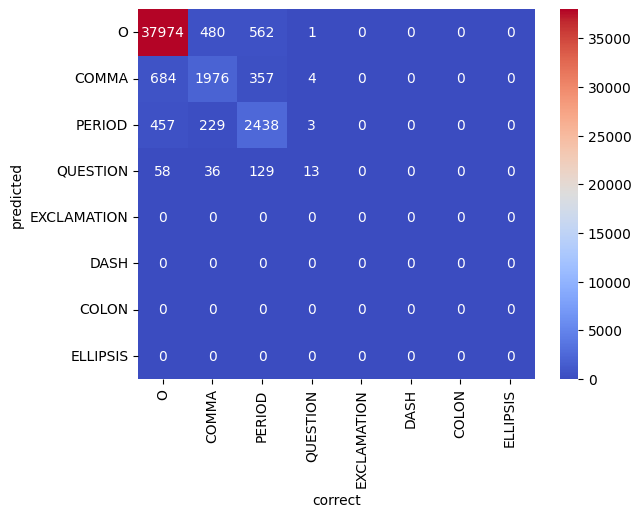

In [33]:
import seaborn as sns
from config import punctuation_dict
import matplotlib.pyplot as plt

cm_img = sns.heatmap(cm, annot=True, cmap="coolwarm", xticklabels=punctuation_dict.keys(), yticklabels=punctuation_dict.keys(), fmt='d')
cm_img.set_xlabel("correct")
cm_img.set_ylabel("predicted")
# mlflow.log_figure(cm_img.get_figure(), "confusion_matrix.png")
plt.show()

In [29]:
parameters = 'runs:/58b6208c3f4c4d9eab209e82241e2a0b/parameters'
run = mlflow.get_run("58b6208c3f4c4d9eab209e82241e2a0b")
True if run.data.params["Use CRF"] == "True" else False


'False'